<html>
    <h1>Hallo und Willkommen!</h1>
    <h2>Klassifikation mit logistischer Regression</h2>
    <p>In Klassifikationsaufgaben handelt es sich dabei, Datensätze ahnad einer oder mehreren unabhängigen Variablen zu klassifizieren. Als Klasse versteht man dabei eine Kategorie, die sich auf Basis von gewissen Merkmalen identifizieren lässt. In einer Klassifikationsaufgabe können Datensätze zu zwei Klassen (binär) oder mehreren Klassen (multiple) zugeordnet werden.</p>
    <p>Logistische Regression ist ein Algorithmus des maschinellen Lernens, der man zur Bewältigung von Klassifikationsaufgaben sehr gut anwenden kann.</p>
    <p></p>
<img src='https://eloquentarduino.github.io/wp-content/uploads/2019/12/iris.png' width='250px;' align='center'/>
    <p>
        In diesem Projekt werden wir sehen, wie dieser Algorithmus zur Klassifikation von Iris-Blumen, auch <a href='https://de.wikipedia.org/wiki/Schwertlilien'>Schwertlilien</a> genannt, eingesetzt werden kann.
    </p>
    
<p>Schwertlilien werden anhand ihrer visuellen Merkmale, u. a. die Länge und Breite ihrer großen und kleinen Blumenblättchen (jeweils Sepal und Petal genannt) in verschiedenen Klassen kategorisiert.</p>
    
<p>Gehen Sie Schritt für Schritt durch, und erfüllen Sie diese Klassifikationaufgabe mit logistischer Regression. Viel Spaß!</p>
    
</html>

#### Datenquelle

Die Bibliothek `Sci-Kit Learn` verfügt über zahlreiche Datensätze (datasets), die mit `load_` Befehl direkt aus dieser Bibliothek _geladen_ werden können. Laden Sie mit der folgenden Zeile die Daten der Irisblumen:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
print(iris.data) # Daten
print(iris.feature_names) # Spaltennamen ohne Target (Features)
print(iris.target) # Target (Klassen)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
['sepal length (cm)', 'sepal width (cm)'

#### Module importieren
Desweiteren benötigen wir noch folgende Module, um die Aufgabe zu bearbeiten:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
print('Module und Funktionen erfolgreich importiert.')

Module und Funktionen erfolgreich importiert.


#### Ein Dataframe erstellen
Erstellen Sie aus der geladenen Daten `iris.data` mit Hilfe von Pandas `DataFrame` ein Dataframe und ermitteln Sie die Eckdaten aus diesem Dataframe.

In [43]:
iris_df=pd.DataFrame(iris.data)
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


#### Multiple Classification: Mehrere Klassen anstatt zwei
In diesem DataFrame können mehrere Klassen von Iris-Blumen identifiziert werden.  
Diese sind im Attribut `target_names` zu finden:


In [44]:
iris.target_names



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Daten vorbereiten

Appendieren Sie diese Spalte an das oben genannte Dataframe.

In [46]:
iris_df['target'] = iris.target
iris_df['target_names']=iris.target
iris_df['target_names'] = iris_df['target_names'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


Erstellen Sie aus Daten ein zweidimensionales Array `X`

In [47]:
X = iris_df.drop(columns=['target_names', 'target']) 


Erstellen Sie aus Daten ein eindimensionales Array `y`

In [48]:
y = iris_df['target']

Demnächst spalten Sie die zwei Variablen `X` und `y` mit Hilfe der Funktion `train_test_split` in Train- und Test-Set auf. Dazu kann 75% der Daten zum Training verwendet werden.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) # 75 % - Training, 25 % - test

#### Modell erstellen, trainieren und testen
Erstellen Sie dann ein Modell der Klasse `LogisticRegression`

In [50]:
modell= LogisticRegression()

Trainieren Sie das Modell anhand der Train-Set.

In [51]:
modell.fit(X_train, y_train)

LogisticRegression()

Ermitteln Sie die Genauigkeit des trainierten Modells in Train- und Test-Set mit Hilfe der Methode `score()`

In [52]:
modell.score(X_train, y_train)

0.9642857142857143

In [53]:
modell.score(X_test, y_test)

0.9210526315789473

Lassen Sie das trainierte Modell anhand Features in Test-Set Einschätzungen zu machen. Dazu kann die Methode `predict()` eingesetzt werden.

In [54]:
y_pred = modell.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 0])

Ermitteln Sie dann den R²-Wert des Modells anhand dieser Einschätzung und mit Hilfe der Funktion `r2_score`

In [55]:
r2 = r2_score(y_test, y_pred)
print(f'R2-Wert: {r2:}')

R2-Wert: 0.8912213740458016


Erstellt eine Klassifkationsreport für das Modell 

In [56]:
klas_report = classification_report(y_test, y_pred)
print(f'\tKlassifikationsreport:\n\n{klas_report}')


	Klassifikationsreport:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.82      0.90      0.86        10
           2       0.93      0.88      0.90        16

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



#### Modell anwenden
Zu welcher Klasse kann eine Iris-Blume mit folgenden Merkmalen zugeordnet werden?
```python
sepal_length, sepal_width, petal_length, petal_width = (4.7, 3.2, 1.3, 0.2)
```

In [57]:
modell.predict([[4.7, 3.2, 1.3, 0.2]])

array([0])

#### Visualisierung
Visualisieren Sie die Verteilung der verschiedenen Klassen(Blumenarten) mit einem beliebiegen Diagramm.

Text(0.5, 1.0, 'Pairplot')

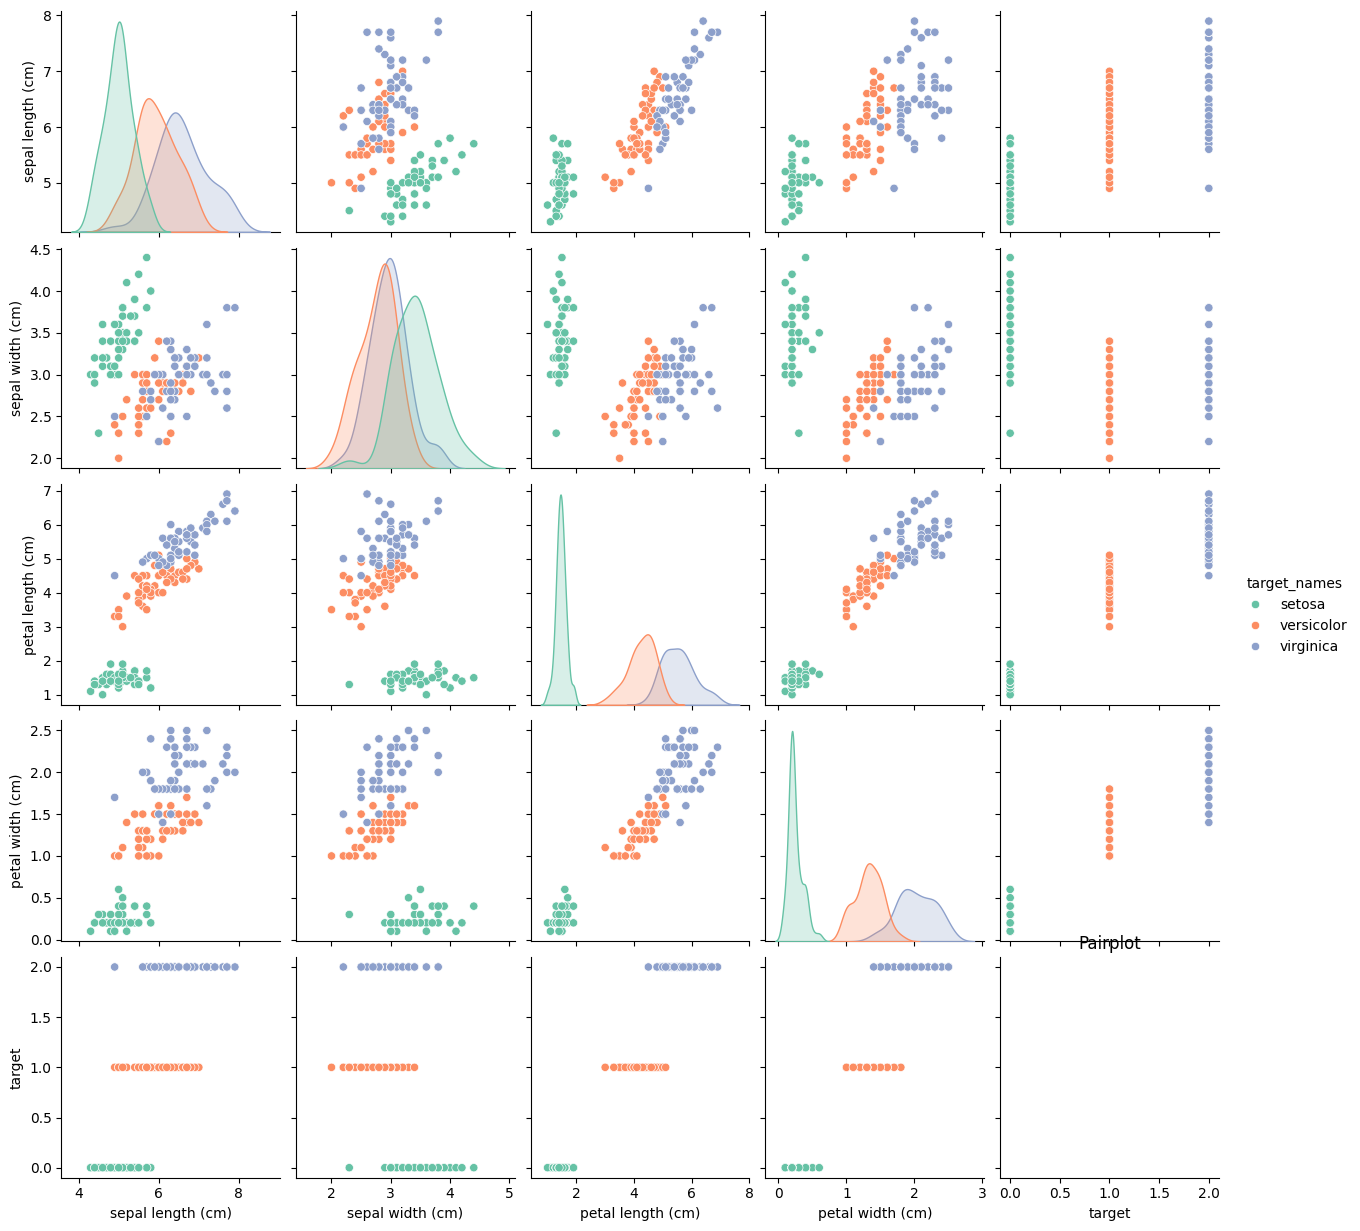

In [67]:
sns.pairplot(iris_df, hue='target_names', palette='Set2')
plt.title('Pairplot')

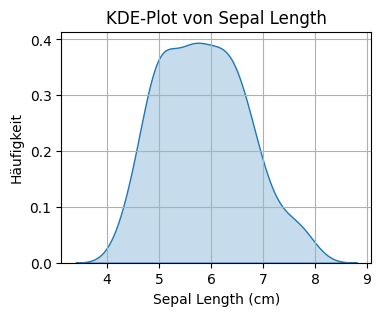

In [68]:
plt.figure(figsize=(4,3))
sns.kdeplot(iris_df['sepal length (cm)'], shade=True)
plt.title('KDE-Plot von Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Häufigkeit')
plt.grid()

In [64]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


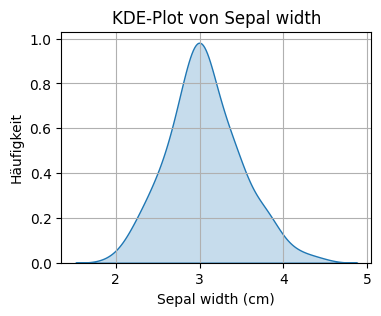

In [85]:
plt.figure(figsize=(4,3))
sns.kdeplot(iris_df['sepal width (cm)'], shade=True)
plt.title('KDE-Plot von Sepal width')
plt.xlabel('Sepal width (cm)')
plt.ylabel('Häufigkeit')
plt.grid()

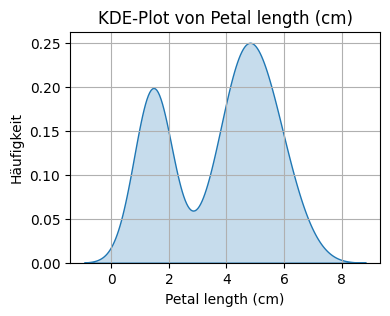

In [95]:
plt.figure(figsize=(4,3))
sns.kdeplot(iris_df['petal length (cm)'], shade=True)
plt.title('KDE-Plot von Petal length (cm)')
plt.xlabel('Petal length (cm)')
plt.ylabel('Häufigkeit')
plt.grid()

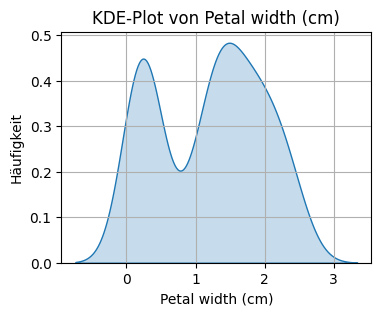

In [94]:
plt.figure(figsize=(4,3))
sns.kdeplot(iris_df['petal width (cm)'], shade=True)
plt.title('KDE-Plot von Petal width (cm)')
plt.xlabel('Petal width (cm)')
plt.ylabel('Häufigkeit')
plt.grid()

Text(0.5, 1.0, 'Die Verteilung der verschiedenen Klassen(Blumenarten)')

<Figure size 400x300 with 0 Axes>

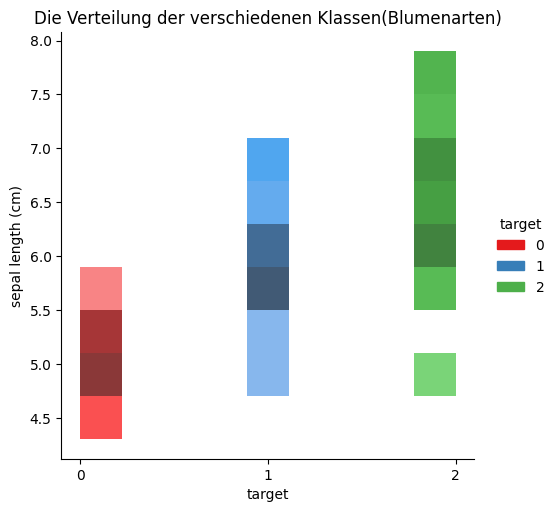

In [87]:
plt.figure(figsize=(4,3))
sns.displot(x ='target', y='sepal length (cm)',data=iris_df, hue='target', palette='Set1')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.title('Die Verteilung der verschiedenen Klassen(Blumenarten)')


In [88]:
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


([<matplotlib.axis.XTick at 0x22b0bf07560>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

<Figure size 400x300 with 0 Axes>

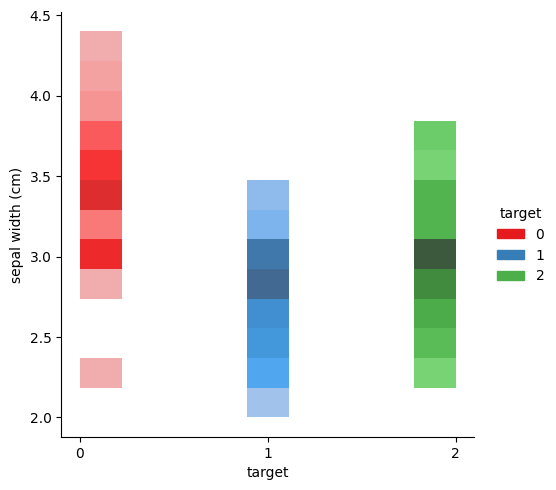

In [89]:
plt.figure(figsize=(4,3))
sns.displot(x ='target', y='sepal width (cm)',data=iris_df, hue='target', palette='Set1')
plt.xticks([0, 1, 2], ['0', '1', '2'])


([<matplotlib.axis.XTick at 0x22b107aabd0>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

<Figure size 400x300 with 0 Axes>

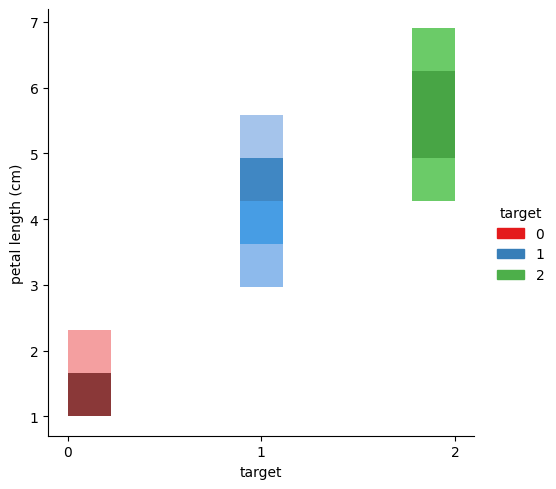

In [90]:
plt.figure(figsize=(4,3))
sns.displot(x ='target', y='petal length (cm)',data=iris_df, hue='target', palette='Set1')
plt.xticks([0, 1, 2], ['0', '1', '2'])


Text(0.5, 1.0, 'Die Verteilung der verschiedenen Klassen(Blumenarten)')

<Figure size 400x300 with 0 Axes>

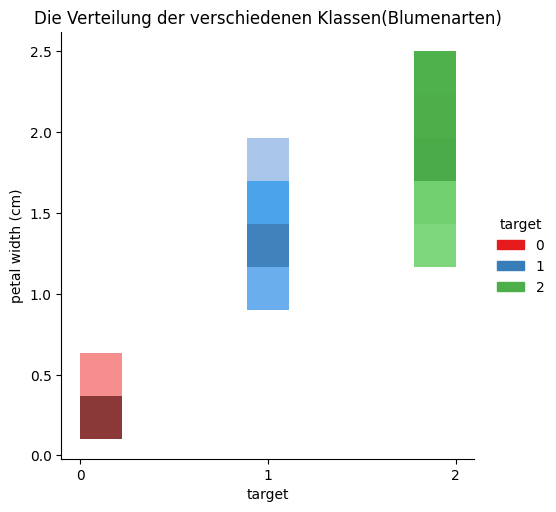

In [91]:
plt.figure(figsize=(4,3))
sns.displot(x ='target', y='petal width (cm)',data=iris_df, hue='target', palette='Set1')
plt.xticks([0, 1, 2], ['0', '1', '2'])
plt.title('Die Verteilung der verschiedenen Klassen(Blumenarten)')

Vielen Dank!